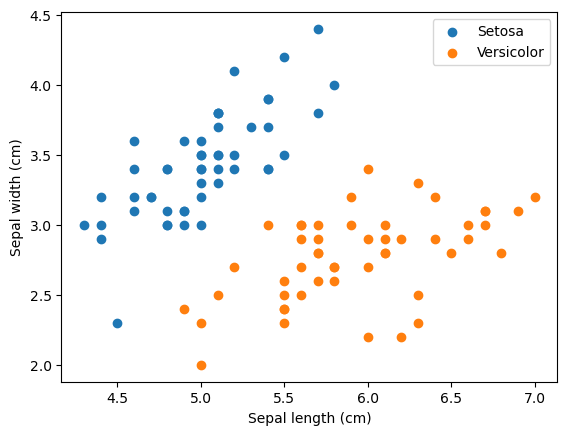

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris data
iris = datasets.load_iris()

# size of flowre
iris_data = iris.data
# print(iris_data)
# print(iris_data.shape)  

# show the result
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")  # Sepal lengthとSepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")  # Sepal lengthとSepal width
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

In [7]:
iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() 
sw_data = iris_data[:100, 1].copy()

In [11]:
# Average value to 0
sl_ave = np.average(sl_data)  # Average
sl_data -= sl_ave  # subtract average
sw_ave = np.average(sw_data)
sw_data -= sw_ave


In [22]:
input_data = []
for i in range(100): # 1-99
    input_data.append([sl_data[i], sw_data[i]])

In [35]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Neuron
class Neuron:
    def __init__(self):  # standard setting 
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0


In [39]:
class NeuralNetwork:
    def __init__(self):  # first setting 
        self.neuron = Neuron()  #Neuron instance
        self.w = [0.5, -0.2]
        self.bias = 0.0

    def commit(self, input_data):  # check working
        self.neuron.reset()

        self.neuron.set_input(input_data[0] * self.w[0])
        self.neuron.set_input(input_data[1] * self.w[1])
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# Neural Network instance
neural_network = NeuralNetwork()


In [51]:
# check the result 
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

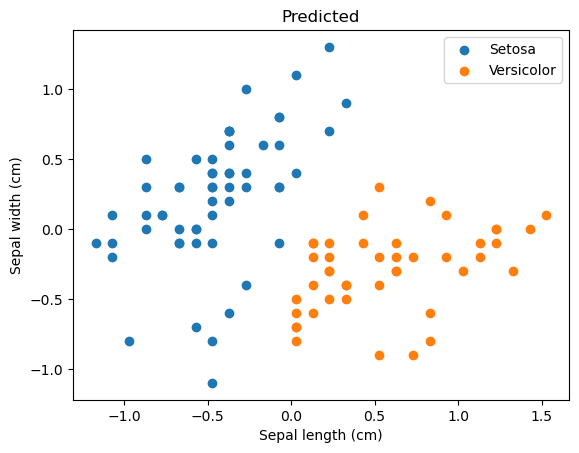

In [53]:
# show the result 
# scatter map
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

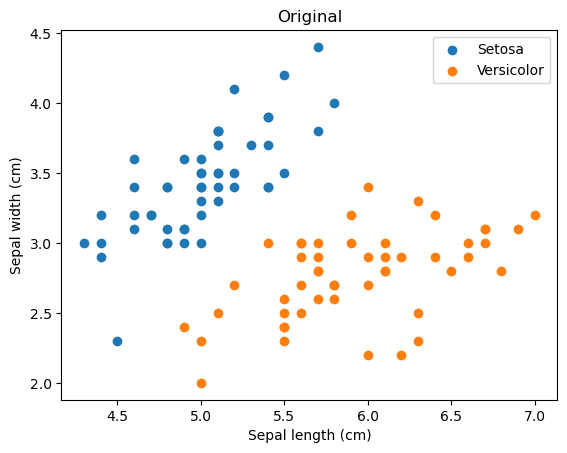

In [55]:
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()